<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_07_ode_problemas_set_29_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""A variety of methods to solve first order ordinary differential equations.

AUTHOR:
    Jonathan Senning <jonathan.senning@gordon.edu>
    Gordon College
    Based Octave functions written in the spring of 1999
    Python version: March 2008, October 2008
"""
# http://www.math-cs.gordon.edu/courses/mat342/python/diffeq.py

'A variety of methods to solve first order ordinary differential equations.\n\nAUTHOR:\n    Jonathan Senning <jonathan.senning@gordon.edu>\n    Gordon College\n    Based Octave functions written in the spring of 1999\n    Python version: March 2008, October 2008\n'

No handles with labels found to put in legend.


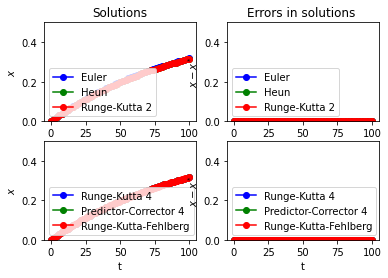

In [2]:

def euler( f, x0, t ):
    """Euler's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = euler(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = np.array( [x0] * n )
    for i in range( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )

    return x

#-----------------------------------------------------------------------------

def heun( f, x0, t ):
    """Heun's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = heun(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """
    n = len( t )
    x = np.array( [x0] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

#-----------------------------------------------------------------------------


def pc4( f, x0, t ):
    """Adams-Bashforth-Moulton 4th order predictor-corrector method

    USAGE:
        x = pc4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function used the Adams-Bashforth-Moulton predictor-corrector
        method to solve the initial value problem

            dx
            -- = f(x,t),     x(t(1)) = x0
            dt

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].  The 4th-order Runge-Kutta method is used to generate
        the first three values of the solution.  Notice that it works equally
        well for scalar functions f(x,t) (in the case of a single 1st order
        ODE) or for vector functions f(x,t) (in the case of multiple 1st order
        ODEs).

    """

    n = len( t )
    x = np.array( [ x0 ] * n )

    # Start up with 4th order Runge-Kutta (single-step method).  The extra
    # code involving f0, f1, f2, and f3 helps us get ready for the multi-step
    # method to follow in order to minimize the number of function evaluations
    # needed.

    f1 = f2 = f3 = 0
    for i in range( min( 3, n - 1 ) ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        k1 = h * f0
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
        f1, f2, f3 = ( f0, f1, f2 )

    # Begin Adams-Bashforth-Moulton steps

    for i in range( 3, n - 1 ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        w = x[i] + h * ( 55.0 * f0 - 59.0 * f1 + 37.0 * f2 - 9.0 * f3 ) / 24.0
        fw = f( w, t[i+1] )
        x[i+1] = x[i] + h * ( 9.0 * fw + 19.0 * f0 - 5.0 * f1 + f2 ) / 24.0
        f1, f2, f3 = ( f0, f1, f2 )

    return x

#-----------------------------------------------------------------------------
def rk2a( f, x0, t ):
    """Second-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rk2a(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Analysis", 6th Edition, by Burden and Faires, Brooks-Cole, 1997.
    """

    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] ) / 2.0
        x[i+1] = x[i] + h * f( x[i] + k1, t[i] + h / 2.0 )

    return x

#-----------------------------------------------------------------------------

def rk2b( f, x0, t ):
    """Second-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rk2b(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Mathematics and Computing" 4th Edition, by Cheney and Kincaid,
        Brooks-Cole, 1999.
    """

    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

#-----------------------------------------------------------------------------

def rk4( f, x0, t ):
    """Fourth-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rk4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

#-----------------------------------------------------------------------------

def rk45( f, x0, t ):
    """Fourth-order Runge-Kutta method with error estimate.

    USAGE:
        x, err = rk45(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        err   - NumPy array containing estimate of errors at each step.  If
                a system is being solved, err will be an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Mathematics and Computing" 6th Edition, by Cheney and Kincaid,
        Brooks-Cole, 2008.
    """

    # Coefficients used to compute the independent variable argument of f

    c20  =   2.500000000000000e-01  #  1/4
    c30  =   3.750000000000000e-01  #  3/8
    c40  =   9.230769230769231e-01  #  12/13
    c50  =   1.000000000000000e+00  #  1
    c60  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    c21 =   2.500000000000000e-01  #  1/4
    c31 =   9.375000000000000e-02  #  3/32
    c32 =   2.812500000000000e-01  #  9/32
    c41 =   8.793809740555303e-01  #  1932/2197
    c42 =  -3.277196176604461e+00  # -7200/2197
    c43 =   3.320892125625853e+00  #  7296/2197
    c51 =   2.032407407407407e+00  #  439/216
    c52 =  -8.000000000000000e+00  # -8
    c53 =   7.173489278752436e+00  #  3680/513
    c54 =  -2.058966861598441e-01  # -845/4104
    c61 =  -2.962962962962963e-01  # -8/27
    c62 =   2.000000000000000e+00  #  2
    c63 =  -1.381676413255361e+00  # -3544/2565
    c64 =   4.529727095516569e-01  #  1859/4104
    c65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute 4th order RK estimate

    a1  =   1.157407407407407e-01  #  25/216
    a2  =   0.000000000000000e-00  #  0
    a3  =   5.489278752436647e-01  #  1408/2565
    a4  =   5.353313840155945e-01  #  2197/4104
    a5  =  -2.000000000000000e-01  # -1/5

    b1  =   1.185185185185185e-01  #  16.0/135.0
    b2  =   0.000000000000000e-00  #  0
    b3  =   5.189863547758284e-01  #  6656.0/12825.0
    b4  =   5.061314903420167e-01  #  28561.0/56430.0
    b5  =  -1.800000000000000e-01  # -9.0/50.0
    b6  =   3.636363636363636e-02  #  2.0/55.0

    n = len( t )
    x = np.array( [ x0 ] * n )
    e = np.array( [ 0 * x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + c21 * k1, t[i] + c20 * h )
        k3 = h * f( x[i] + c31 * k1 + c32 * k2, t[i] + c30 * h )
        k4 = h * f( x[i] + c41 * k1 + c42 * k2 + c43 * k3, t[i] + c40 * h )
        k5 = h * f( x[i] + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4, \
                        t[i] + h )
        k6 = h * f( \
            x[i] + c61 * k1 + c62 * k2 + c63 * k3 + c64 * k4 + c65 * k5, \
            t[i] + c60 * h )

        x[i+1] = x[i] + a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
        x5 = x[i] + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6

        e[i+1] = abs( x5 - x[i+1] )

    return ( x, e )

#-----------------------------------------------------------------------------
def rkf( f, a, b, x0, tol, hmax, hmin ):
    """Runge-Kutta-Fehlberg method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        t, x = rkf(f, a, b, x0, tol, hmax, hmin)

    INPUT:
        f     - function equal to dx/dt = f(x,t)
        a     - left-hand endpoint of interval (initial condition is here)
        b     - right-hand endpoint of interval
        x0    - initial x value: x0 = x(a)
        tol   - maximum value of local truncation error estimate
        hmax  - maximum step size
        hmin  - minimum step size

    OUTPUT:
        t     - NumPy array of independent variable values
        x     - NumPy array of corresponding solution function values

    NOTES:
        This function implements 4th-5th order Runge-Kutta-Fehlberg Method
        to solve the initial value problem

           dx
           -- = f(x,t),     x(a) = x0
           dt

        on the interval [a,b].

        Based on pseudocode presented in "Numerical Analysis", 6th Edition,
        by Burden and Faires, Brooks-Cole, 1997.
    """

    # Coefficients used to compute the independent variable argument of f

    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute local truncation error estimate.  These
    # come from subtracting a 4th order RK estimate from a 5th order RK
    # estimate.

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    # Coefficients used to compute 4th order RK estimate

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    # Set t and x according to initial condition and assume that h starts
    # with a value that is as large as possible.
  
    t = a
    x = x0
    h = hmax

    # Initialize arrays that will be returned

    T = np.array( [t] )
    X = np.array( [x] )

    while t < b:

        # Adjust step size when we get to last interval

        if t + h > b:
            h = b - t;

        # Compute values needed to compute truncation error estimate and
        # the 4th order RK estimate.

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        # Compute the estimate of the local truncation error.  If it's small
        # enough then we accept this step and save the 4th order estimate.
    
        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( np.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append( T, t )
            X = np.append( X, [x], 0 )

        # Now compute next step size, and make sure that it is not too big or
        # too small.

        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            print( "Error: stepsize should be smaller than %e." % hmin )
            break

    # endwhile

    return ( T, X )
#-----------------------------------------------------------------------------

if __name__ == "__main__":
    from pylab import *

    def f( x, t ):
      V=80 #m3
      Q2=0.8   # m3/min
      Q1=0.005 # m3/min
      dV_dt=Q1-Q2*x/V
      return dV_dt
      
    a0=0 # ylim(a0,b0)
    b0=0.5 # ylim(a0,b0)
    a, b = ( 0.0, 100.0 )
    x0 = 0.0

    n = 51
    t = np.linspace( a, b, n )
    h = t[1] - t[0];
    tol = 1e-6

    # compute various numerical solutions
    x_euler = euler( f, x0, t )
    x_heun = heun( f, x0, t )
    x_rk2 = rk2a( f, x0, t )
    x_rk4 = rk4( f, x0, t )
    x_pc4 = pc4( f, x0, t )
    t_rkf, x_rkf = rkf( f, a, b, x0, tol, 1.0, 0.01 ) # unequally spaced t

    # compute true solution values in equal spaced and unequally spaced cases
    V=80 #m3
    Q1=0.005 # m3/min
    Q2=0.8 # m3/min
    x = V*Q1/Q2*(1.0-np.exp(-Q2*t/V))
    xrkf = V*Q1/Q2*(1.0-np.exp(-Q2*t_rkf/V))

plt.legend(fontsize=2) 
#   figure( 1 )
subplot( 2, 2, 1 )
plot( t, x_euler, 'b-o', t, x_heun, 'g-o', t, x_rk2, 'r-o' )
ylim(a0,b0)
xlabel( 't' )
ylabel( '$x$' )
title( 'Solutions')
legend( ( 'Euler ', 'Heun ', 'Runge-Kutta 2' ),
            loc='lower left' )

#   figure( 2 )
subplot( 2, 2, 2 )
plot( t, x_euler - x, 'b-o', t, x_heun - x, 'g-o', t, x_rk2 - x, 'r-o' )
ylim(a0,b0)
xlabel( 't' )
ylabel( '$x - x^*$' )
title( 'Errors in solutions ' )
legend( ( 'Euler', 'Heun', 'Runge-Kutta 2' ),loc='lower left' )

#   figure( 3 )
subplot( 2, 2, 3 )
plot( t, x_rk4, 'b-o', t, x_pc4, 'g-o', t_rkf, x_rkf, 'r-o' )
ylim(a0,b0)
xlabel( 't' )
ylabel( '$x$' )
#title( 'Solutions ' )
legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4', \
              'Runge-Kutta-Fehlberg' ), loc='lower left' )

#   figure( 4 )
subplot( 2, 2, 4 )
plot( t, x_rk4 - x, 'b-o', t, x_pc4 - x, 'g-o', t_rkf, x_rkf - xrkf, 'r-o' )
ylim(a0,b0)
xlabel( 't' )
ylabel( '$x - x^*$' )
#title( 'Errors in solutions ' )
legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4','Runge-Kutta-Fehlberg' ), loc='lower left' )

show()

In [3]:
x_rk4

array([0.        , 0.00990066, 0.01960528, 0.02911773, 0.03844183,
       0.04758129, 0.05653978, 0.06532088, 0.07392811, 0.08236489,
       0.09063462, 0.0987406 , 0.10668607, 0.11447421, 0.12210813,
       0.12959089, 0.13692548, 0.14411484, 0.15116184, 0.1580693 ,
       0.16483998, 0.17147659, 0.17798179, 0.18435818, 0.1906083 ,
       0.19673467, 0.20273973, 0.20862587, 0.21439547, 0.22005082,
       0.22559418, 0.23102778, 0.23635379, 0.24157433, 0.2466915 ,
       0.25170735, 0.25662387, 0.26144304, 0.26616679, 0.27079699,
       0.27533552, 0.27978417, 0.28414474, 0.28841896, 0.29260854,
       0.29671517, 0.30074048, 0.30468608, 0.30855356, 0.31234445,
       0.31606028])

In [4]:
x

array([0.        , 0.00990066, 0.01960528, 0.02911773, 0.03844183,
       0.04758129, 0.05653978, 0.06532088, 0.07392811, 0.08236489,
       0.09063462, 0.0987406 , 0.10668607, 0.11447421, 0.12210813,
       0.12959089, 0.13692548, 0.14411484, 0.15116184, 0.1580693 ,
       0.16483998, 0.17147659, 0.17798179, 0.18435818, 0.1906083 ,
       0.19673467, 0.20273973, 0.20862587, 0.21439547, 0.22005082,
       0.22559418, 0.23102778, 0.23635379, 0.24157433, 0.2466915 ,
       0.25170735, 0.25662387, 0.26144304, 0.26616679, 0.27079699,
       0.27533552, 0.27978417, 0.28414474, 0.28841896, 0.29260854,
       0.29671517, 0.30074048, 0.30468608, 0.30855356, 0.31234445,
       0.31606028])

In [5]:
x-x_rk4

array([0.00000000e+00, 1.32890400e-11, 2.60517649e-11, 3.83038323e-11,
       5.00605113e-11, 6.13365678e-11, 7.21464138e-11, 8.25040869e-11,
       9.24233190e-11, 1.01917377e-10, 1.10999210e-10, 1.19681376e-10,
       1.27976241e-10, 1.35895642e-10, 1.43451237e-10, 1.50654322e-10,
       1.57515917e-10, 1.64046748e-10, 1.70257114e-10, 1.76157228e-10,
       1.81756887e-10, 1.87065780e-10, 1.92093147e-10, 1.96848038e-10,
       2.01339334e-10, 2.05575557e-10, 2.09565060e-10, 2.13316032e-10,
       2.16836243e-10, 2.20133384e-10, 2.23214974e-10, 2.26088176e-10,
       2.28760066e-10, 2.31237529e-10, 2.33527170e-10, 2.35635400e-10,
       2.37568576e-10, 2.39332887e-10, 2.40934162e-10, 2.42378173e-10,
       2.43670528e-10, 2.44816667e-10, 2.45821863e-10, 2.46691223e-10,
       2.47429854e-10, 2.48042475e-10, 2.48533860e-10, 2.48908449e-10,
       2.49170795e-10, 2.49325172e-10, 2.49375687e-10])